http://d.hatena.ne.jp/n_shuyo/20091018/gaussian

http://naoyat.hatenablog.jp/entry/2012/11/13/220933

http://mathesaurus.sourceforge.net/r-numpy.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

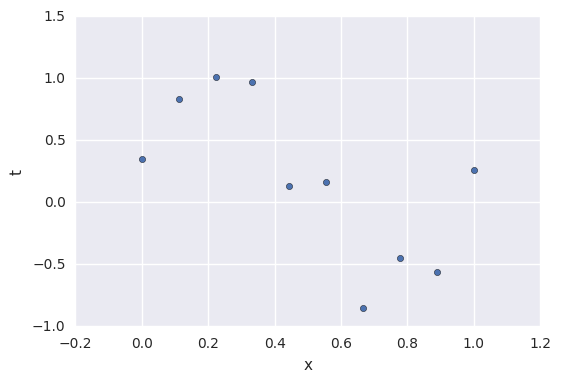

In [119]:
curve_fitting = pd.DataFrame({
        "x":[0.000000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000],
        "t":[0.349486,0.830839,1.007332,0.971507,0.133066,0.166823,-0.848307,-0.445686,-0.563567,0.261502]
    })
curve_fitting.plot(kind="scatter",x="x", y="t")

In [200]:
# Gaussian kernel
def kernel(x1, x2, sigma=0.1):
    return np.exp(-(x1-x2)*(x1-x2)/(2*sigma*sigma))

def outer(x1, x2, func, **kwargs):
    len_x1 = len(x1)
    len_x2 = len(x2)
    res = np.zeros((len_x1, len_x2))
    for i in range(len_x1):
        for j in range(len_x2):
            res[i][j] = func(x1[i], x2[j], **kwargs)
    return res

# mean of posterior = regression function
def m(x, beta = 25, **kwargs):
    # Gram matrix
    K = outer(curve_fitting.x, curve_fitting.x, kernel, **kwargs)

    # covariance of marginal
    # テキストのδ_{nm}の値の意味は n=m のとき1となるでよいです？
    C_N = K + np.diag([1]*10) / float(beta)
    inv_C_N = np.linalg.inv(C_N)
    return np.dot(np.dot(outer(x, curve_fitting.x, kernel, **kwargs),
                         inv_C_N),
                  np.array(curve_fitting.t)
    )

# np.arange(1,10,1)
x = np.arange(0,1,.01)


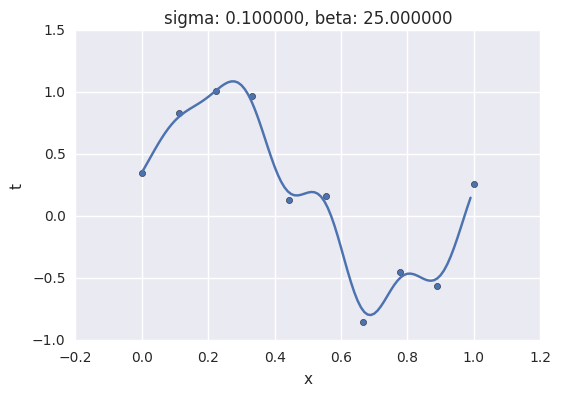

In [201]:
fig, ax = plt.subplots()
plt.plot(x, m(x))
curve_fitting.plot(kind="scatter",x="x", y="t", ax=ax)
ax.set_title("sigma: %f, beta: %f" % (0.1, 25))

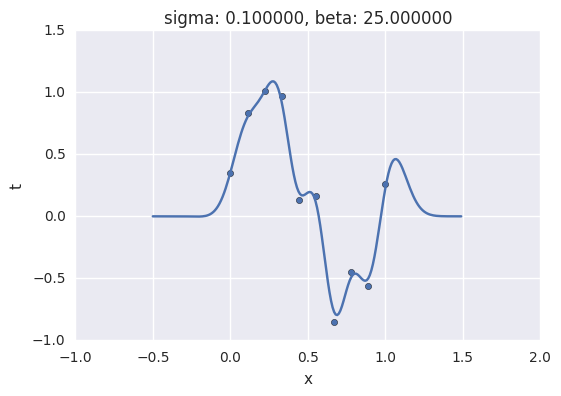

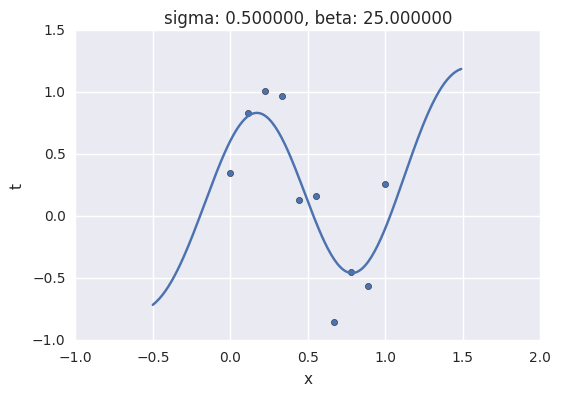

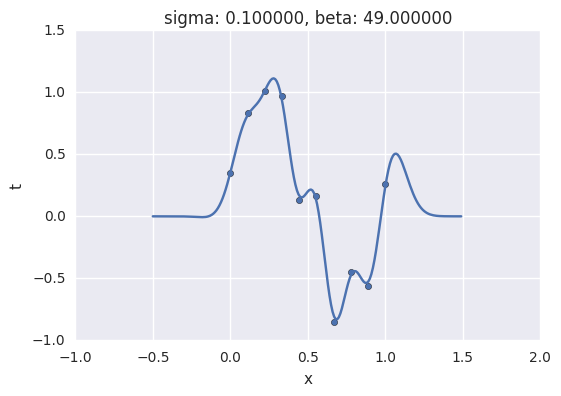

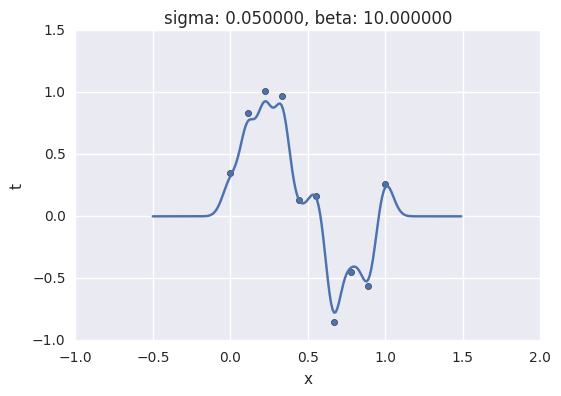

In [202]:
params = [
    # sigma, beta
    [0.1, 25],
    [0.5, 25],
    [0.1, 49],
    [0.05, 10],
]

for p in params:
    x = np.arange(-.5,1.5,.01)
    fig, ax = plt.subplots()
    plt.plot(x, m(x, sigma=p[0], beta=p[1]))
    curve_fitting.plot(kind="scatter",x="x", y="t", ax=ax)
    ax.set_title("sigma: %f, beta: %f" % (p[0], p[1]))
    ax